In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/diabetes.csv')

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.shape

(768, 9)

In [5]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 768
Number of Columns 9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# data_copy = data.copy(deep=True)

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# Pregnancies	عدد حالات الحمل التي مرت بها المرأة.
# Glucose	مستوى الجلوكوز في الدم (عادةً بعد صيام).
# BloodPressure	ضغط الدم الانقباضي (mm Hg).
# SkinThickness	سمك الجلد (مم) في منطقة العضلة الثلاثية (Triceps skin fold thickness).
# Insulin	مستوى الأنسولين في الدم (μU/ml).
# BMI	مؤشر كتلة الجسم (Body Mass Index)، وهو وزن الشخص مقسومًا على مربع طوله.
# DiabetesPedigreeFunction	مؤشر يقيّم التاريخ العائلي للإصابة بالسكري، كلما زادت القيمة زادت احتمالية الإصابة.
# Age	عمر المريض (بالسنوات).
# Outcome	النتيجة، هل الشخص مصاب بالسكري (1) أم لا (0).

In [12]:
#  فحص القيم الفارغة أو الغريبة
# بعض الأعمدة مثل Glucose, BloodPressure, SkinThickness, Insulin, BMI قد تحتوي على قيم صفر، وهذا قد يعني عدم وجود قياس أو قياس غير منطقي.
print((data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


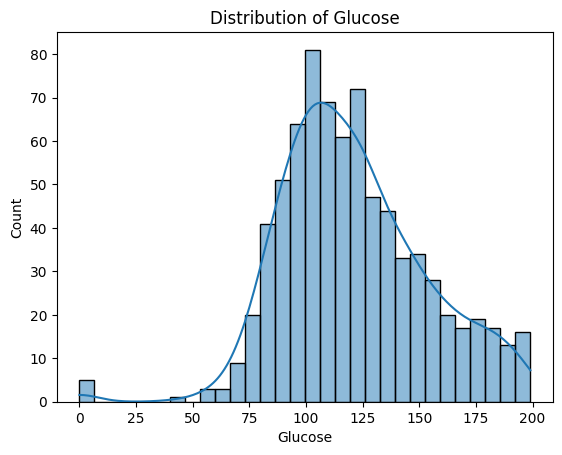

In [13]:
# توزيع Glucose:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Glucose'], bins=30, kde=True)
plt.title('Distribution of Glucose')
plt.show()

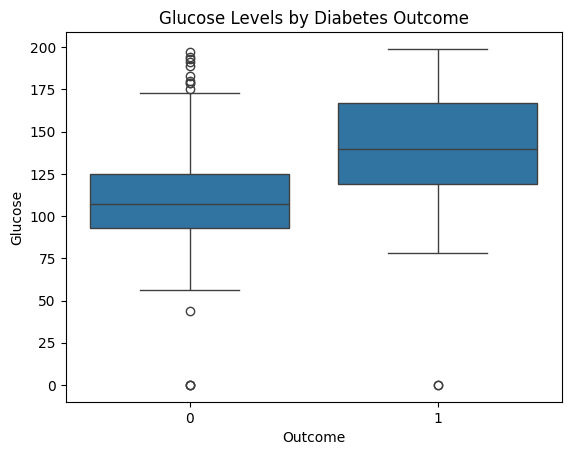

In [14]:
# مقارنة الأعمدة حسب حالة السكري (Outcome)
# مثلاً، توزيع Glucose للمرضى المصابين وغير المصابين:
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

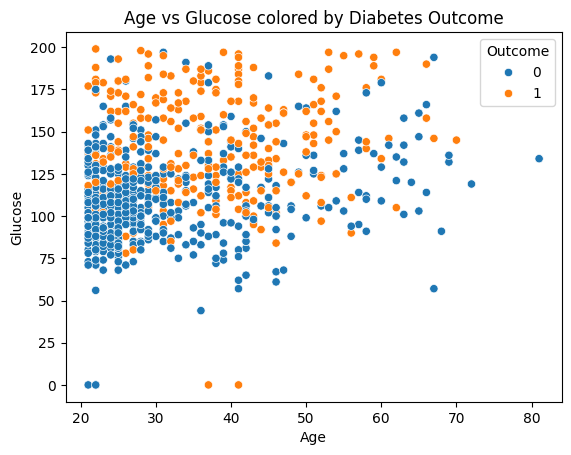

In [15]:
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=data)
plt.title('Age vs Glucose colored by Diabetes Outcome')
plt.show()

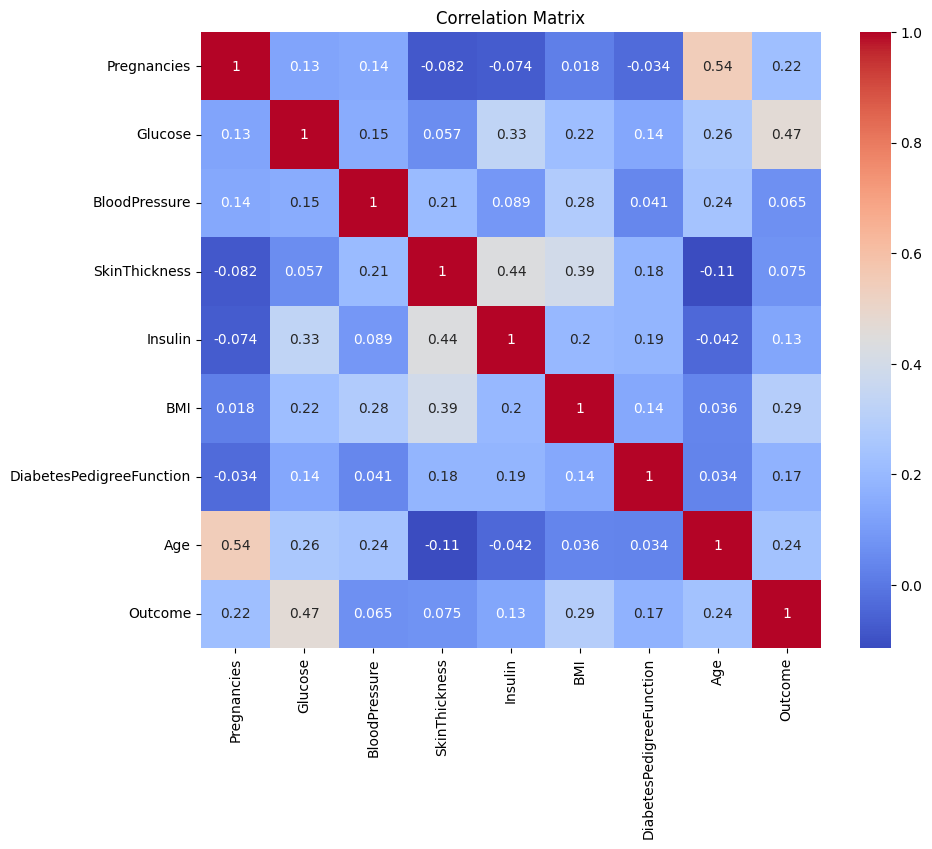

In [16]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
#  معالجة القيم المفقودة (Missing Data Handling)
# ✅ الطريقة المقترحة: استبدال القيم الصفرية بالوسيط (median)
# لماذا الوسيط؟ لأنه أقل تأثرًا بالقيم المتطرفة.

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    median_val = data[data[col] != 0][col].median()
    data[col] = data[col].replace(0, median_val)

In [18]:
# data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
# data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
# data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
# data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
# data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

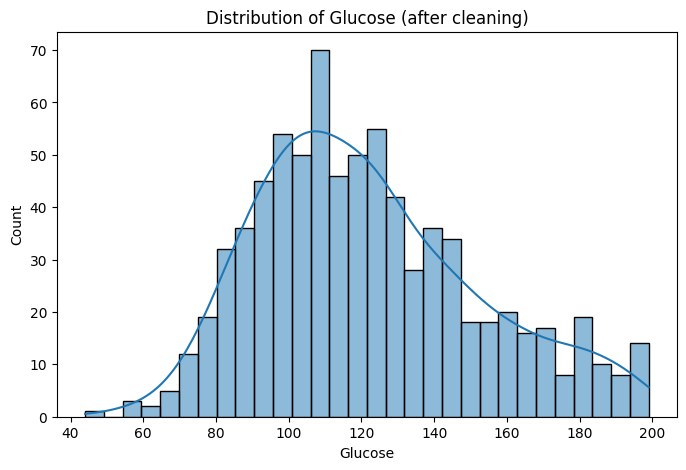

In [19]:
# توزيع القيم بعد التنظيف ( Glucose)
plt.figure(figsize=(8, 5))
sns.histplot(data['Glucose'], kde=True, bins=30)
plt.title('Distribution of Glucose (after cleaning)')
plt.show()

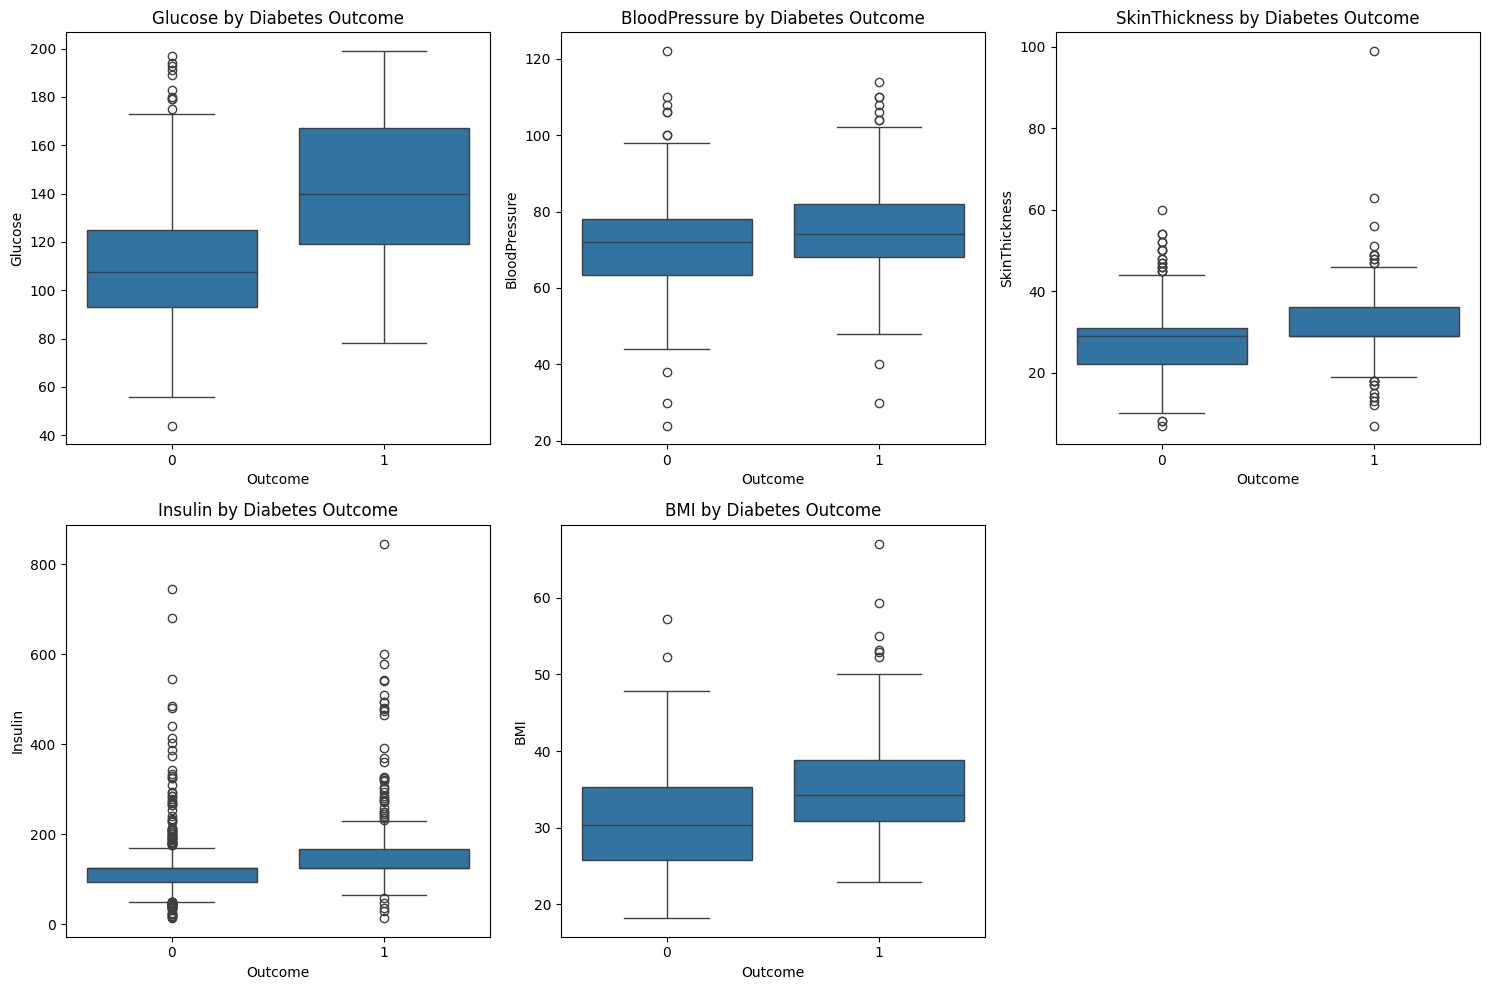

In [20]:
#Boxplots لمقارنة القيم حسب حالة السكري
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} by Diabetes Outcome')
plt.tight_layout()
plt.show()

In [21]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# إزالة القيم الشاذة من كل عمود على حدة (اختياري، حسب التحليل)
for col in features:
    data = remove_outliers_iqr(data, col)

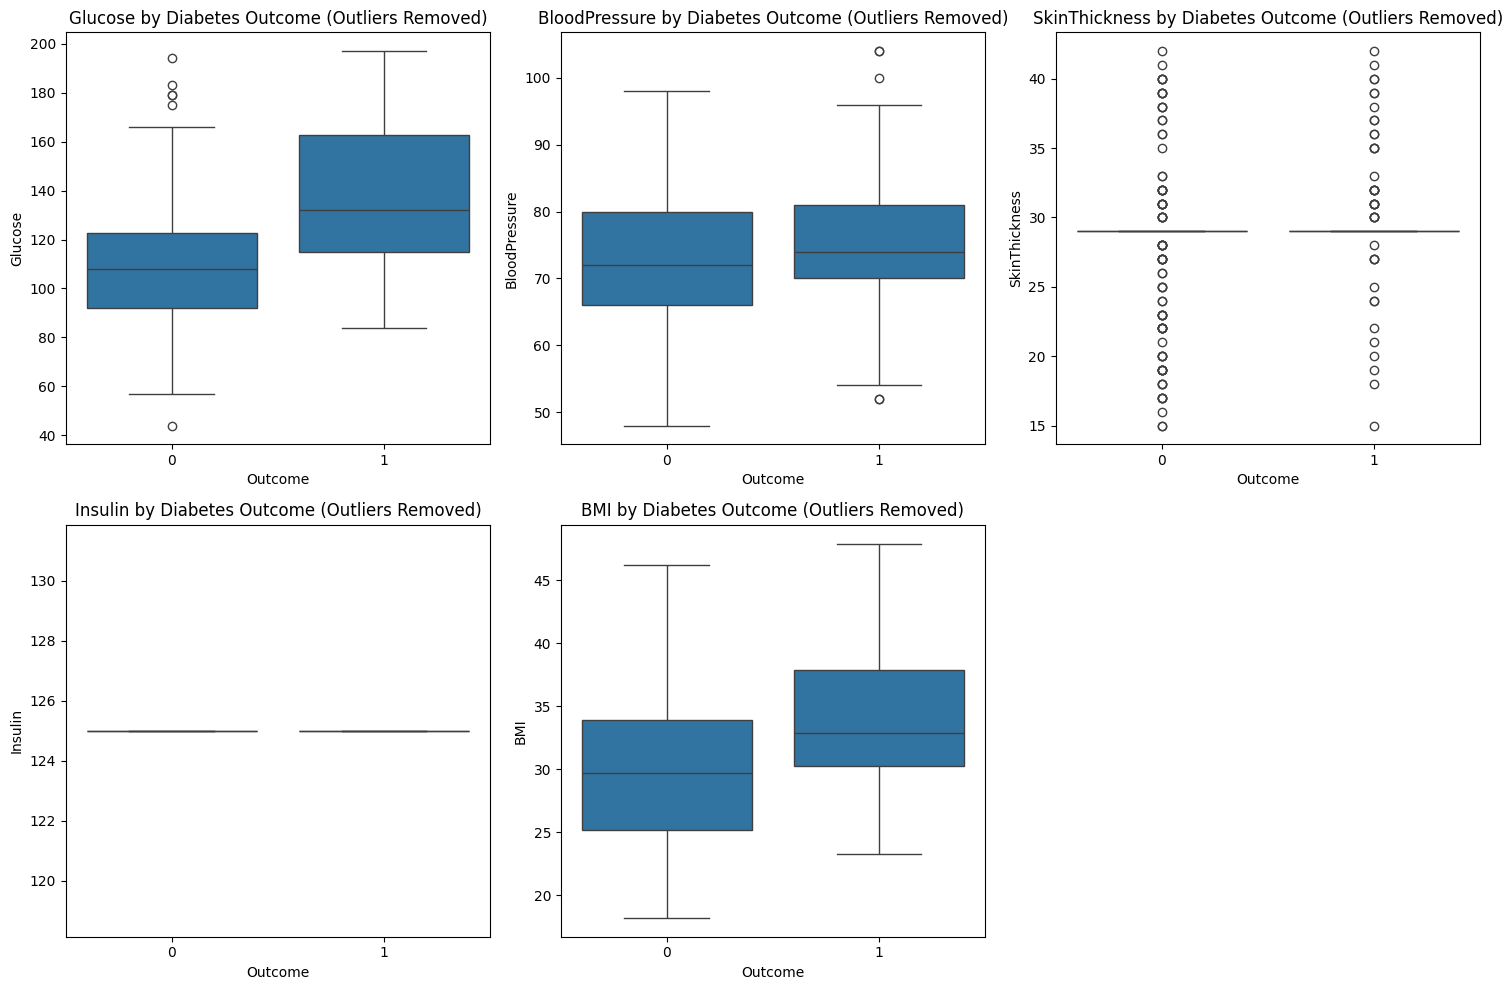

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} by Diabetes Outcome (Outliers Removed)')
plt.tight_layout()
plt.show()


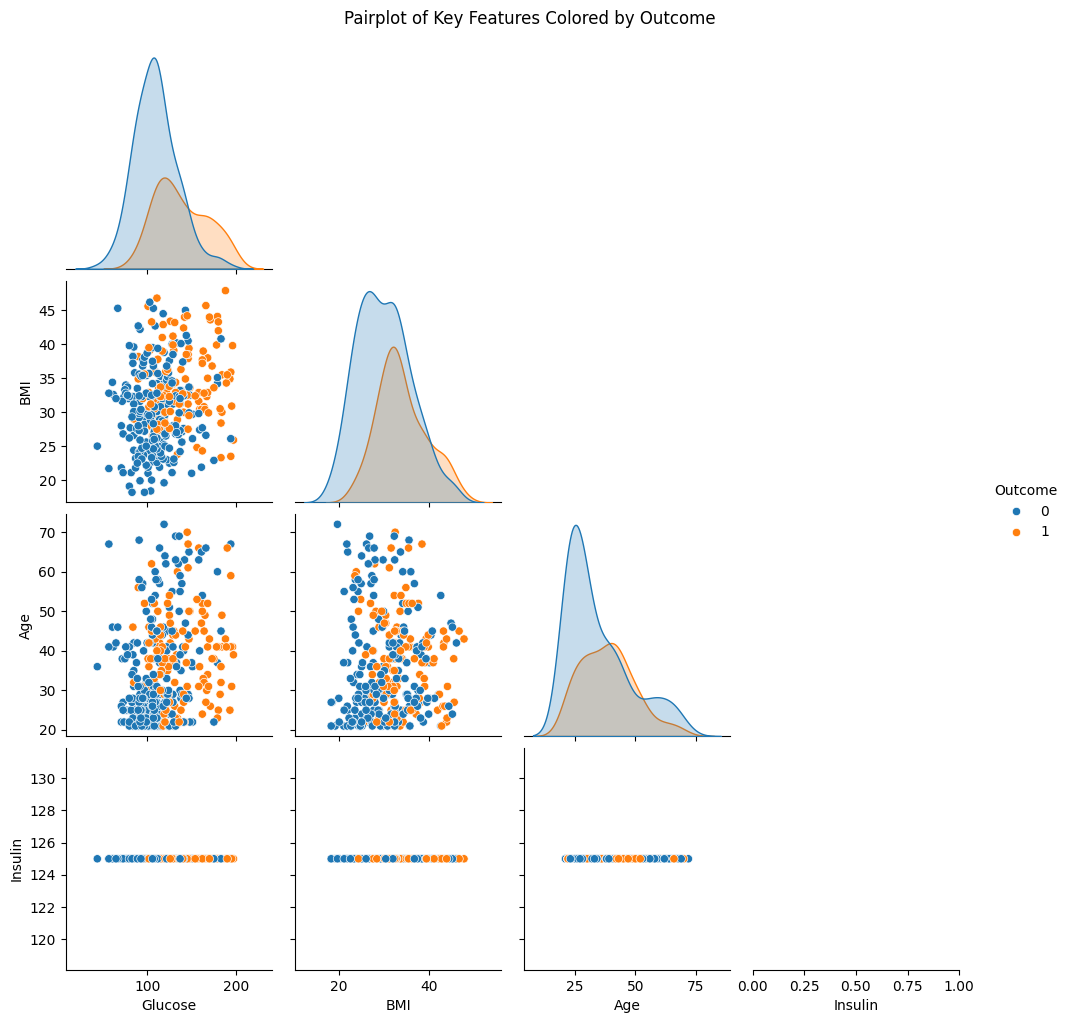

In [23]:
sns.pairplot(data[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', corner=True)
plt.suptitle("Pairplot of Key Features Colored by Outcome", y=1.02)
plt.show()

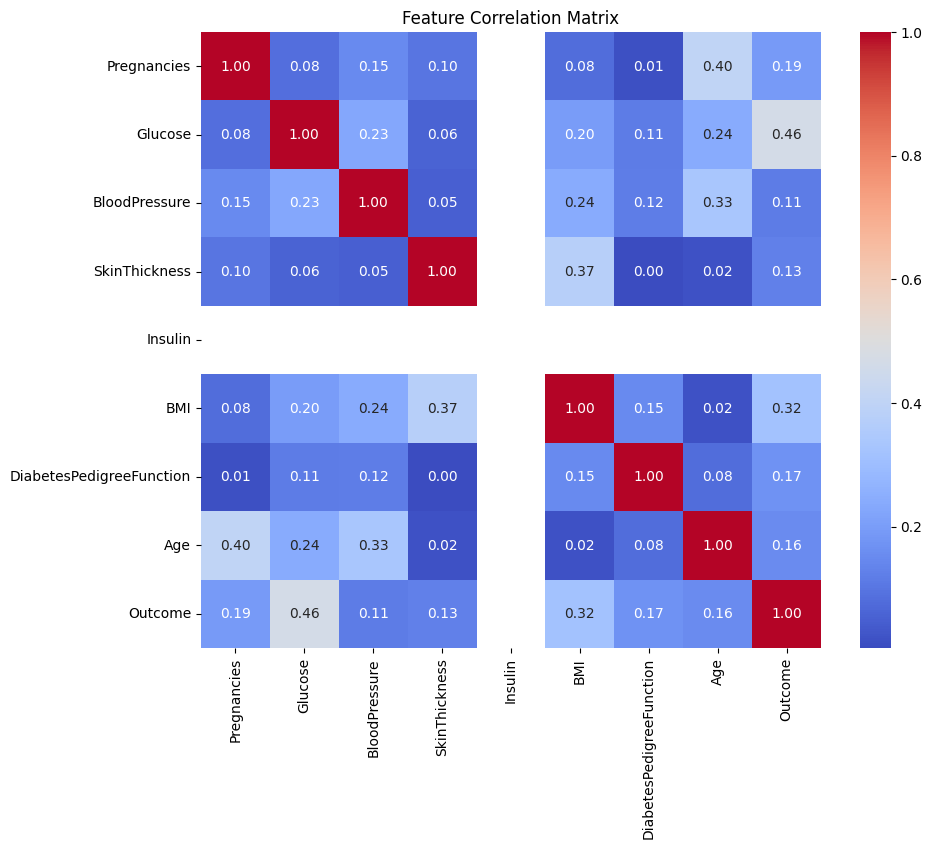

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
#توحيد القياسات (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("{} Test Accuracy:{}".format(y_test,model_lr.score(X_test,y_test)*100))

Logistic Regression Accuracy: 0.6901408450704225
[[35 11]
 [11 14]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        46
           1       0.56      0.56      0.56        25

    accuracy                           0.69        71
   macro avg       0.66      0.66      0.66        71
weighted avg       0.69      0.69      0.69        71

93     1
0      1
124    1
343    0
270    1
      ..
160    0
767    0
686    0
38     1
166    0
Name: Outcome, Length: 71, dtype: int64 Test Accuracy:69.01408450704226


In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("{} Test Accuracy:{}".format(y_test,model_rf.score(X_test,y_test)*100))

Random Forest Accuracy: 0.7323943661971831
[[35 11]
 [ 8 17]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        46
           1       0.61      0.68      0.64        25

    accuracy                           0.73        71
   macro avg       0.71      0.72      0.71        71
weighted avg       0.74      0.73      0.74        71

93     1
0      1
124    1
343    0
270    1
      ..
160    0
767    0
686    0
38     1
166    0
Name: Outcome, Length: 71, dtype: int64 Test Accuracy:73.23943661971832


In [31]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7183098591549296
[[37  9]
 [11 14]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        46
           1       0.61      0.56      0.58        25

    accuracy                           0.72        71
   macro avg       0.69      0.68      0.69        71
weighted avg       0.71      0.72      0.72        71




Logistic Regression Accuracy: 0.690
[[35 11]
 [11 14]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        46
           1       0.56      0.56      0.56        25

    accuracy                           0.69        71
   macro avg       0.66      0.66      0.66        71
weighted avg       0.69      0.69      0.69        71


Decision Tree Accuracy: 0.606
[[31 15]
 [13 12]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69        46
           1       0.44      0.48      0.46        25

    accuracy                           0.61        71
   macro avg       0.57      0.58      0.58        71
weighted avg       0.61      0.61      0.61        71


Random Forest Accuracy: 0.732
[[35 11]
 [ 8 17]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        46
           1       0.61      0.68      0.64        25

    accuracy              

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:06:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.718
[[34 12]
 [ 8 17]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        46
           1       0.59      0.68      0.63        25

    accuracy                           0.72        71
   macro avg       0.70      0.71      0.70        71
weighted avg       0.73      0.72      0.72        71


SVM Accuracy: 0.789
[[41  5]
 [10 15]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85        46
           1       0.75      0.60      0.67        25

    accuracy                           0.79        71
   macro avg       0.78      0.75      0.76        71
weighted avg       0.78      0.79      0.78        71


KNN Accuracy: 0.718
[[37  9]
 [11 14]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        46
           1       0.61      0.56      0.58        25

    accuracy                           0.72        71
   m

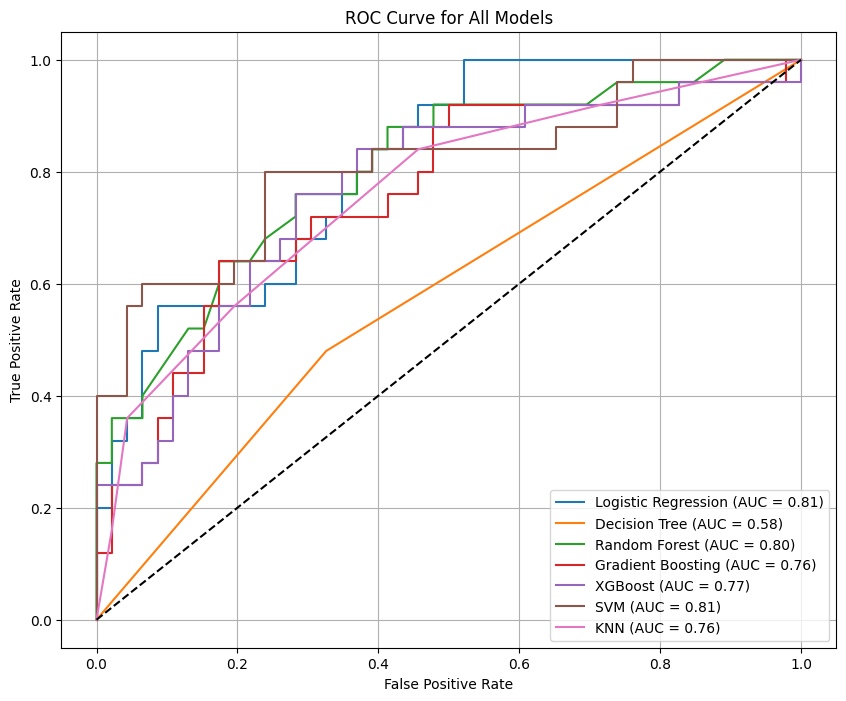

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# 3. تعريف النماذج
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# 4. تدريب النماذج وتقييم الأداء + ROC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Needed for ROC

    # Accuracy & classification report
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # ROC & AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # خط عشوائي
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [33]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,
},index=[0])

In [34]:
p = model_rf.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [35]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

diabetic


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6345 - loss: 0.6928 - val_accuracy: 0.6901 - val_loss: 0.6377
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6815 - loss: 0.6230 - val_accuracy: 0.7042 - val_loss: 0.5956
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6690 - loss: 0.6094 - val_accuracy: 0.7746 - val_loss: 0.5629
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6815 - loss: 0.5812 - val_accuracy: 0.7746 - val_loss: 0.5353
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7361 - loss: 0.5133 - val_accuracy: 0.7465 - val_loss: 0.5126
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7151 - loss: 0.5521 - val_accuracy: 0.7465 - val_loss: 0.4995
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7533 - loss: 0.5333 - val_accuracy: 0.7465 - val_loss: 0.4902
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7369 - loss: 0.4910 - val_accuracy: 0.7606

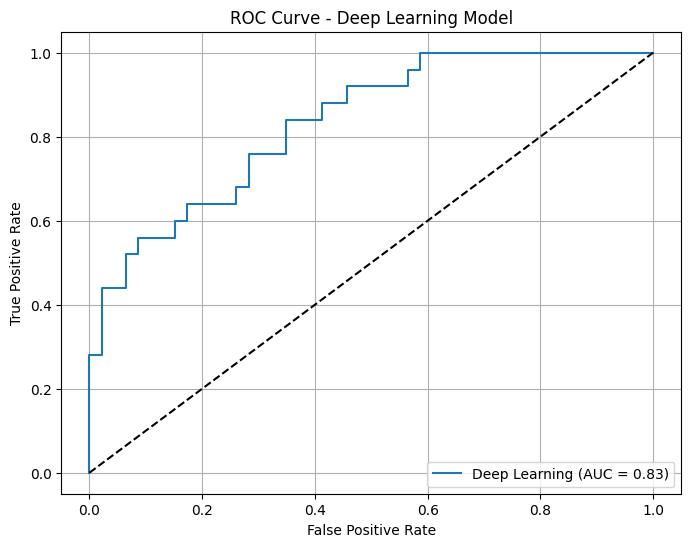

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. تجهيز البيانات (X_train, X_test, y_train, y_test تم تجهيزها مسبقًا)
# ملاحظة: y يجب أن تكون نوع float للتوافق مع Keras
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# 2. بناء نموذج الشبكة العصبية
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # إخراج احتمالية للإصابة بالسكري
])

# 3. تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Early stopping للتقليل من overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 5. تدريب النموذج
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=16,
                    callbacks=[early_stop],
                    verbose=1)

# 6. تقييم النموذج
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nDeep Learning Model Accuracy: {accuracy:.3f}')

# 7. التنبؤ بالاحتمال ورسم ROC
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# رسم ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Deep Learning (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Deep Learning Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Dropout	يقلل من overfitting بجعل النموذج لا يعتمد على أعصاب معينة بشكل زائد
# EarlyStopping	يوقف التدريب تلقائيًا إذا لم يتحسن الأداء على مجموعة التحقق
# Binary Crossentropy	تستخدم لتصنيف ثنائي (0 أو 1)
# Sigmoid	لتحويل الخرج إلى احتمالية بين 0 و 1

In [37]:
# New sample input: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
new_patient = np.array([[2, 130, 70, 25, 96, 28.4, 0.35, 31]])

In [38]:
# 1. تحويل البيانات بنفس الطريقة
new_patient_scaled = scaler.transform(new_patient)

# 2. تنبؤ الاحتمال
prob = model.predict(new_patient_scaled).ravel()[0]

# 3. التفسير
print(f"Probability of having diabetes: {prob:.2f}")
print("Predicted Outcome:", "Diabetic" if prob >= 0.5 else "Non-Diabetic")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Probability of having diabetes: 0.00
Predicted Outcome: Non-Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
new_samples = np.array([
    [1, 120, 65, 20, 80, 24.0, 0.2, 28],
    [5, 180, 90, 35, 200, 40.1, 0.9, 50],
    [3, 100, 70, 22, 94, 30.0, 0.5, 35]
])

new_samples_scaled = scaler.transform(new_samples)
probs = model.predict(new_samples_scaled).ravel()

for i, p in enumerate(probs):
    status = "Diabetic" if p >= 0.5 else "Non-Diabetic"
    print(f"Patient {i+1}: Probability = {p:.2f} → {status}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Patient 1: Probability = 0.00 → Non-Diabetic
Patient 2: Probability = 0.07 → Non-Diabetic
Patient 3: Probability = 0.00 → Non-Diabetic


In [40]:
# شبكة أعمق (Deeper Neural Network)
# زيادة عدد الطبقات والوحدات العصبية:
model_deep = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_deep.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model_deep.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5891 - loss: 0.6759 - val_accuracy: 0.6620 - val_loss: 0.6147
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6490 - loss: 0.6138 - val_accuracy: 0.7042 - val_loss: 0.5562
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6853 - loss: 0.5432 - val_accuracy: 0.7746 - val_loss: 0.5133
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7224 - loss: 0.5224 - val_accuracy: 0.7465 - val_loss: 0.4862
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7537 - loss: 0.4697 - val_accuracy: 0.7465 - val_loss: 0.4755
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6869 - loss: 0.5186 - val_accuracy: 0.7465 - val_loss: 0.4769
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7604 - loss: 0.4956 - val_accuracy: 0.7606 - val_loss: 0.4797
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7351 - loss: 0.5149 - val_accuracy: 0.7606 - 

In [41]:
# شبكة باستخدام تنشيط LeakyReLU و BatchNormalization
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

model_leaky = Sequential([
    Dense(64, input_dim=X_train.shape[1]),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [47]:
model_leaky.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_leaky.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model_leaky.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3834 - loss: 1.0113 - val_accuracy: 0.3803 - val_loss: 0.7401
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4622 - loss: 0.9010 - val_accuracy: 0.6338 - val_loss: 0.6745
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6100 - loss: 0.6880 - val_accuracy: 0.6479 - val_loss: 0.6366
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6881 - loss: 0.6497 - val_accuracy: 0.6901 - val_loss: 0.6107
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6589 - loss: 0.6215 - val_accuracy: 0.7042 - val_loss: 0.5850
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6604 - loss: 0.6105 - val_accuracy: 0.7183 - val_loss: 0.5611
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6796 - loss: 0.6085 - val_accuracy: 0.7183 - val_loss: 0.5382
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7223 - loss: 0.5741 - val_accuracy: 0.7324 - 

In [42]:
#  شبكة باستخدام Optimizer مختلف (مثل RMSprop أو Adamax)
model_rmsprop = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rmsprop.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_rmsprop.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model_rmsprop.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5364 - loss: 0.6890 - val_accuracy: 0.7324 - val_loss: 0.6082
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7328 - loss: 0.5898 - val_accuracy: 0.7606 - val_loss: 0.5505
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7451 - loss: 0.5258 - val_accuracy: 0.7465 - val_loss: 0.5152
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7446 - loss: 0.5031 - val_accuracy: 0.7465 - val_loss: 0.4974
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7809 - loss: 0.4648 - val_accuracy: 0.7324 - val_loss: 0.4921
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7456 - loss: 0.4843 - val_accuracy: 0.7324 - val_loss: 0.4843
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7917 - loss: 0.4231 - val_accuracy: 0.7183 - val_loss: 0.4852
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7871 - loss: 0.4458 - val_accuracy: 0.7183 -

In [43]:
# شبكة تستخدم Skip Connections (مثل Residual Connections)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Add

input_layer = Input(shape=(X_train.shape[1],))
dense1 = Dense(64, activation='relu')(input_layer)
dense2 = Dense(64, activation='relu')(dense1)
skip = Add()([dense1, dense2])  # Skip connection
output_layer = Dense(1, activation='sigmoid')(skip)

model_skip = Model(inputs=input_layer, outputs=output_layer)


In [49]:
model_skip.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_skip.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model_skip.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4350 - loss: 0.8007 - val_accuracy: 0.7183 - val_loss: 0.6015
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6892 - loss: 0.5947 - val_accuracy: 0.7465 - val_loss: 0.5464
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7327 - loss: 0.5261 - val_accuracy: 0.7324 - val_loss: 0.5182
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7159 - loss: 0.5356 - val_accuracy: 0.7324 - val_loss: 0.5091
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7748 - loss: 0.4684 - val_accuracy: 0.7465 - val_loss: 0.5063
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7509 - loss: 0.4519 - val_accuracy: 0.7465 - val_loss: 0.5051
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8061 - loss: 0.4263 - val_accuracy: 0.7465 - val_loss: 0.5052
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7531 - loss: 0.4727 - val_accuracy: 0.7

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

NB_FEATURES = X_train.shape[1]

# إنشاء شبكة بسيطة بدون طبقات مخفية
model = Sequential()
model.add(Dense(1, input_shape=(NB_FEATURES,), activation='sigmoid'))

# عرض الهيكل
model.summary()

# التحويل للتصنيف الثنائي باستخدام binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# تدريب النموذج
model_training = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=200,
    verbose=1,
    validation_split=0.2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 818ms/step - accuracy: 0.6677 - loss: 0.6318 - val_accuracy: 0.6140 - val_loss: 0.6201
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.6390 - loss: 0.6443 - val_accuracy: 0.6140 - val_loss: 0.6196
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.6651 - loss: 0.6266 - val_accuracy: 0.6140 - val_loss: 0.6191
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6364 - loss: 0.6401 - val_accuracy: 0.6140 - val_loss: 0.6186
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6439 - loss: 0.6302 - val_accuracy: 0.6140 - val_loss: 0.6182
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6442 - loss: 0.6417 - val_accuracy: 0.6140 - val_loss: 0.6178
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6390 - loss: 0.6380 - val_accuracy: 0.6140 - val_loss: 0.6173
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6546 - loss: 0.6279 - val_accuracy: 0.6140 - va

Epoch 1/370
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 629ms/step - accuracy: 0.3842 - loss: 0.8825 - val_accuracy: 0.2632 - val_loss: 0.9019
Epoch 2/370
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3816 - loss: 0.8516 - val_accuracy: 0.2632 - val_loss: 0.8872
Epoch 3/370
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3634 - loss: 0.8631 - val_accuracy: 0.2632 - val_loss: 0.8731
Epoch 4/370
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3947 - loss: 0.8252 - val_accuracy: 0.2982 - val_loss: 0.8600
Epoch 5/370
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3947 - loss: 0.8164 - val_accuracy: 0.2982 - val_loss: 0.8479
Epoch 6/370
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3794 - loss: 0.8181 - val_accuracy: 0.2982 - val_loss: 0.8369
Epoch 7/370
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3901 - loss: 0.7931 - val_accuracy: 0.2982 - val_loss: 0.8272
Epoch 8/370
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3931 - loss: 0.7989 - val_accuracy: 0.2982 - val_loss

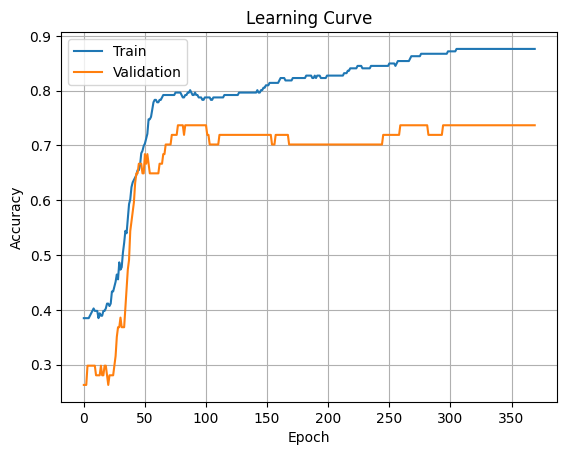

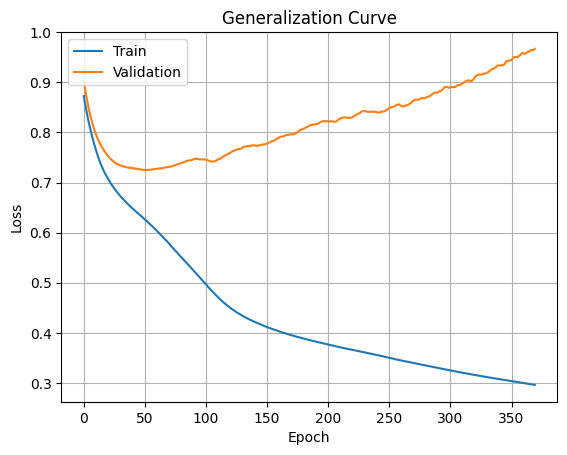

In [51]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# تأكد أن y_train و y_test هي بيانات تصنيف ثنائي (0 أو 1)
# NB_FEATURES
NB_FEATURES = X_train.shape[1]

# بناء النموذج (ممتاز كما طلبت)
model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(NB_FEATURES,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # للإخراج الثنائي

# تجميع النموذج
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# تدريب النموذج
model_training = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=370,
    verbose=1,
    validation_split=0.2
)

# تقييم النموذج على بيانات الاختبار
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy on test set:', score[1])

# رسم منحنى الدقة
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# رسم منحنى الخسارة
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('Generalization Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

In [52]:
# القيم يجب أن تكون بنفس ترتيب الأعمدة الأصلية:
# ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

new_patient = np.array([[2, 130, 70, 25, 96, 28.4, 0.35, 31]])

In [53]:
# تأكد أنك استخدمت نفس الـ scaler
new_patient_scaled = scaler.transform(new_patient)

# التنبؤ
prediction_prob = model.predict(new_patient_scaled).ravel()[0]

# الطباعة
print(f"Probability of having diabetes: {prediction_prob:.2f}")
print("Prediction:", "Diabetic (1)" if prediction_prob >= 0.5 else "Non-Diabetic (0)")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Probability of having diabetes: 0.00
Prediction: Non-Diabetic (0)


In [54]:
new_samples = np.array([
    [1, 120, 65, 20, 80, 24.0, 0.2, 28],
    [5, 180, 90, 35, 200, 40.1, 0.9, 50],
    [3, 100, 70, 22, 94, 30.0, 0.5, 35]
])

# نفس الـ Standardization
new_samples_scaled = scaler.transform(new_samples)
probs = model.predict(new_samples_scaled).ravel()

for i, p in enumerate(probs):
    status = "Diabetic (1)" if p >= 0.5 else "Non-Diabetic (0)"
    print(f"Patient {i+1}: Probability = {p:.2f} → {status}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Patient 1: Probability = 0.00 → Non-Diabetic (0)
Patient 2: Probability = 1.00 → Diabetic (1)
Patient 3: Probability = 0.00 → Non-Diabetic (0)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

# reshape input to (samples, time_steps, features)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_cnn = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history_cnn = model_cnn.fit(
    X_train_cnn, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.5908 - loss: 0.6770 - val_accuracy: 0.6842 - val_loss: 0.6133
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6558 - loss: 0.6152 - val_accuracy: 0.6842 - val_loss: 0.5778
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7843 - loss: 0.5618 - val_accuracy: 0.7368 - val_loss: 0.5668
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7280 - loss: 0.5675 - val_accuracy: 0.7193 - val_loss: 0.5607
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7440 - loss: 0.5360 - val_accuracy: 0.7193 - val_loss: 0.5429
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7484 - loss: 0.5194 - val_accuracy: 0.7193 - val_loss: 0.5373
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7495 - loss: 0.5119 - val_accuracy: 0.6842 - val_loss: 0.5435
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7349 - loss: 0.5089 - val_accuracy: 0.7018 - val_loss

In [56]:
from tensorflow.keras.layers import LSTM

X_train_seq = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_seq = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(
    X_train_seq, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.6352 - loss: 0.6804 - val_accuracy: 0.6491 - val_loss: 0.6639
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6736 - loss: 0.6630 - val_accuracy: 0.6667 - val_loss: 0.6454
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6946 - loss: 0.6442 - val_accuracy: 0.6316 - val_loss: 0.6275
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6996 - loss: 0.6208 - val_accuracy: 0.6491 - val_loss: 0.6016
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7038 - loss: 0.6023 - val_accuracy: 0.6491 - val_loss: 0.5730
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6868 - loss: 0.5655 - val_accuracy: 0.6491 - val_loss: 0.5522
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7048 - loss: 0.5561 - val_accuracy: 0.6491 - val_loss: 0.5473
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7236 - loss: 0.5440 - val_accuracy: 0.6316 - val_loss:

In [58]:
#  بناء نموذج MLP (شبكة Dense متعددة الطبقات)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# بناء نموذج MLP
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # مخرج احتمالي (0-1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model_mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping لإيقاف التدريب في حال عدم التحسن
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# تدريب النموذج
history = model_mlp.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5580 - loss: 0.6962 - val_accuracy: 0.6667 - val_loss: 0.6545
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5765 - loss: 0.6808 - val_accuracy: 0.7018 - val_loss: 0.6326
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6610 - loss: 0.6603 - val_accuracy: 0.7018 - val_loss: 0.6078
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7157 - loss: 0.6239 - val_accuracy: 0.7193 - val_loss: 0.5803
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7353 - loss: 0.6057 - val_accuracy: 0.7368 - val_loss: 0.5619
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7177 - loss: 0.5852 - val_accuracy: 0.7544 - val_loss: 0.5439
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7742 - loss: 0.5478 - val_accuracy: 0.7544 - val_loss: 0.5298
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7257 - loss: 0.5361 - val_accuracy: 0.7544 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7302 - loss: 0.5284

Test Accuracy: 0.72


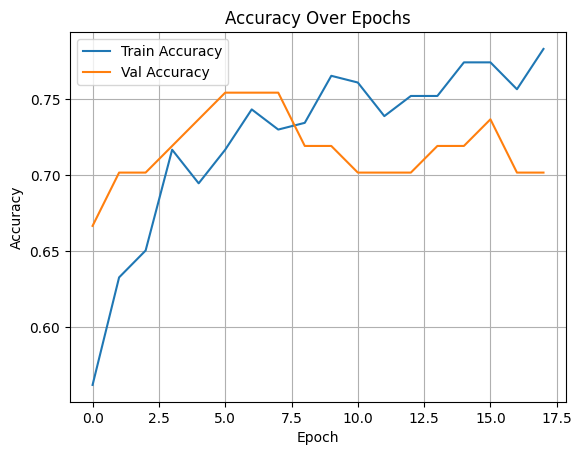

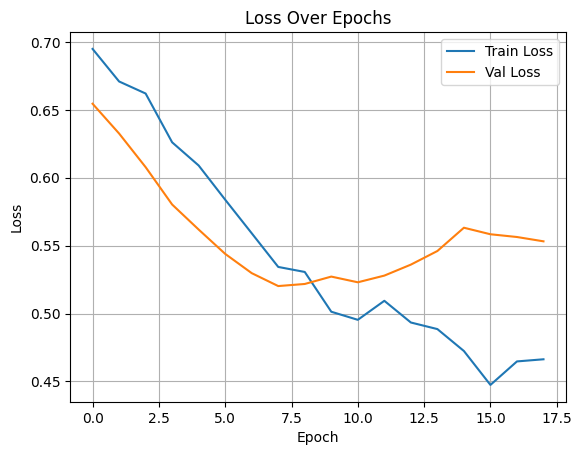

In [61]:
# تقييم على بيانات الاختبار
loss, accuracy = model_mlp.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

# رسم منحنى الدقة
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# رسم منحنى الخسارة
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
new_data = np.array([[2, 130, 70, 25, 96, 28.4, 0.35, 31]])
new_data_scaled = scaler.transform(new_data)

prob = model_mlp.predict(new_data_scaled).ravel()[0]
print(f"Predicted probability: {prob:.2f}")
print("Predicted class:", "Diabetic" if prob >= 0.5 else "Non-Diabetic")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted probability: 0.01
Predicted class: Non-Diabetic
